In [1]:
from MOT import MOT
import numpy as np
import matplotlib.pyplot as plt
import os
from BfTableGenerator import RansacCollector
from BfTableGenerator import TDmapLoader
from tqdm import tqdm
# from open3d import JVisualizer 
from Utils import *
from DDBSCAN import Raster_DBSCAN
import open3d as op3
# op3.visualization.webrtc_server.enable_webrtc()
from open3d.web_visualizer import draw
from VisulizerTools import *
from numpy.lib.stride_tricks import sliding_window_view
from scipy.stats import multivariate_normal



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [15]:
collector = RansacCollector(pcap_path=r'../RawLidarData/McCarranEvans_Train/Train.pcap',output_file_path='../RawLidarData/McCarranEvans_Train',update_frame_num=2000)
collector.gen_tdmap()
# collector.gen_thredmap(d = 1,thred_s = 0.15,N = 20,delta_thred = 1e-3,step = 0.1)

Loading pcap...


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:54<00:00, 17.52it/s]


In [30]:
collector.gen_thredmap(d = 1,thred_s = 0.2,N = 10,delta_thred = 1e-3,step = 0.1)
db = Raster_DBSCAN(window_size=(5,13),eps = 1.7, min_samples= 17, Td_map_szie=collector.thred_map.shape)   
Td_map = collector.aggregated_map[20]
Foreground_map = (Td_map < collector.thred_map)&(Td_map != 0)
Labeling_map = db.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)
Background_map = (Td_map >= collector.thred_map)&(Td_map != 0)
pcd = get_pcd_colored_filtered(Td_map,Labeling_map,Foreground_map)

Generating Threshold Map


Generating Threshold Map


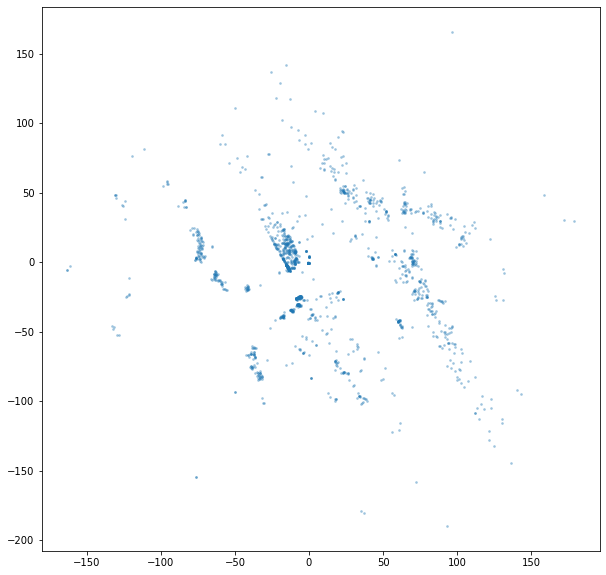

d: 0.2 thred_s: 0.15 Points: 1530
Generating Threshold Map


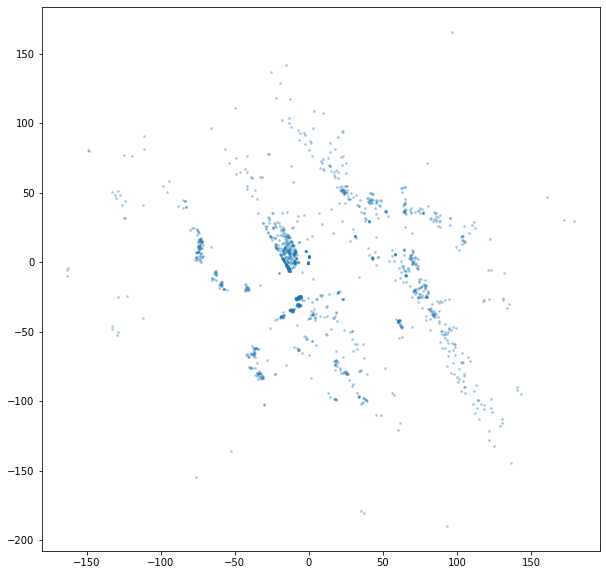

d: 0.2 thred_s: 0.2 Points: 1489
Generating Threshold Map


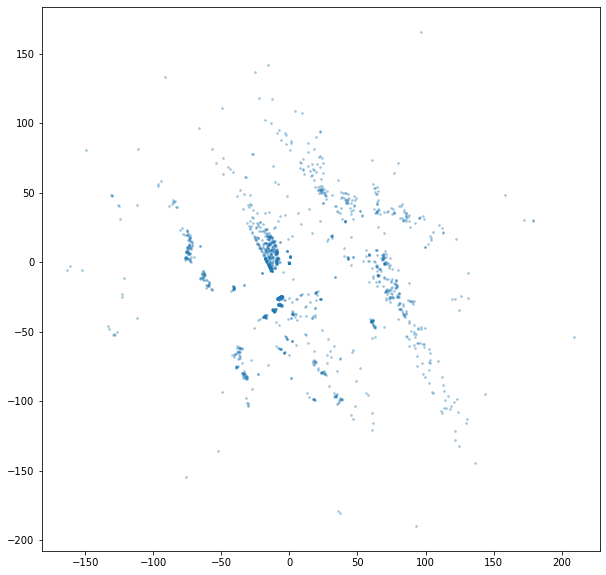

d: 0.2 thred_s: 0.3 Points: 1517
Generating Threshold Map


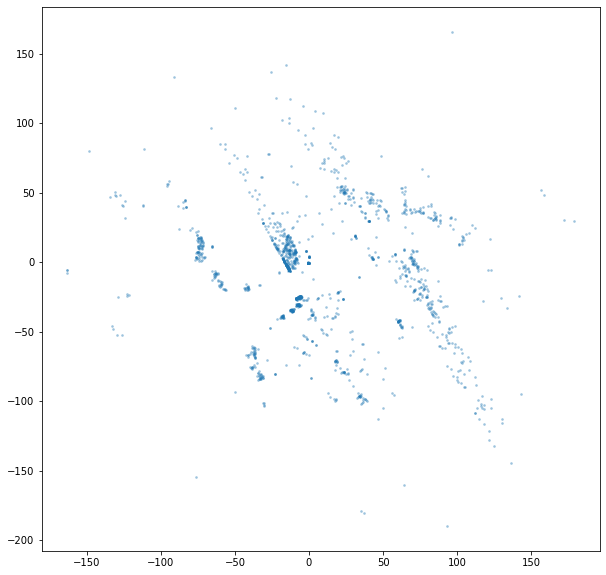

d: 0.2 thred_s: 0.4 Points: 1516
Generating Threshold Map


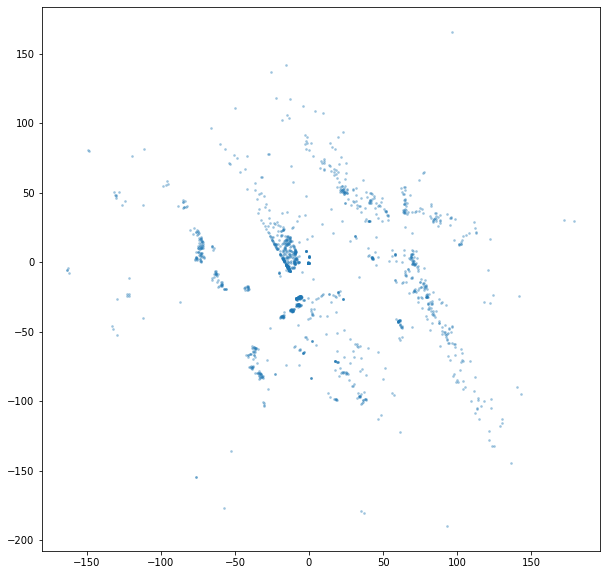

d: 0.2 thred_s: 0.5 Points: 1515
Generating Threshold Map


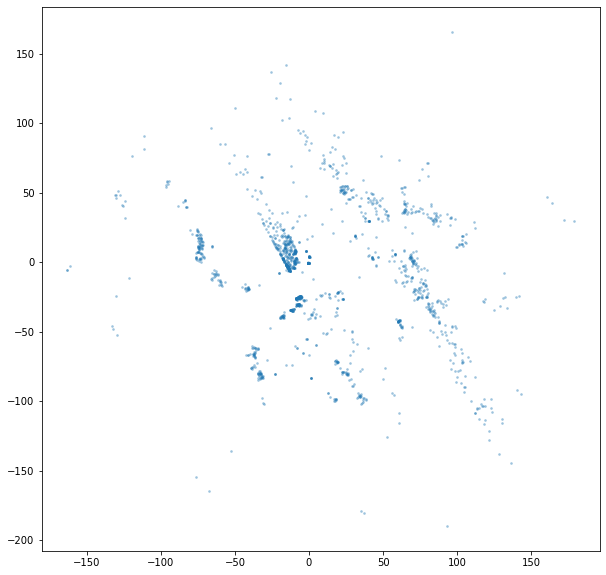

d: 0.3 thred_s: 0.15 Points: 1539
Generating Threshold Map


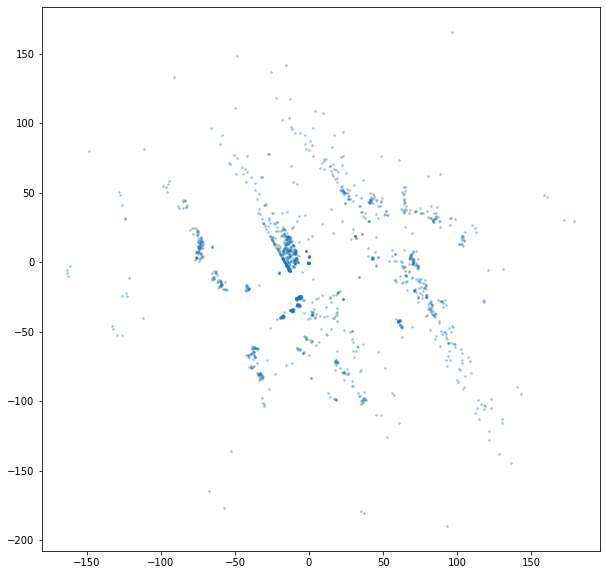

d: 0.3 thred_s: 0.2 Points: 1531
Generating Threshold Map


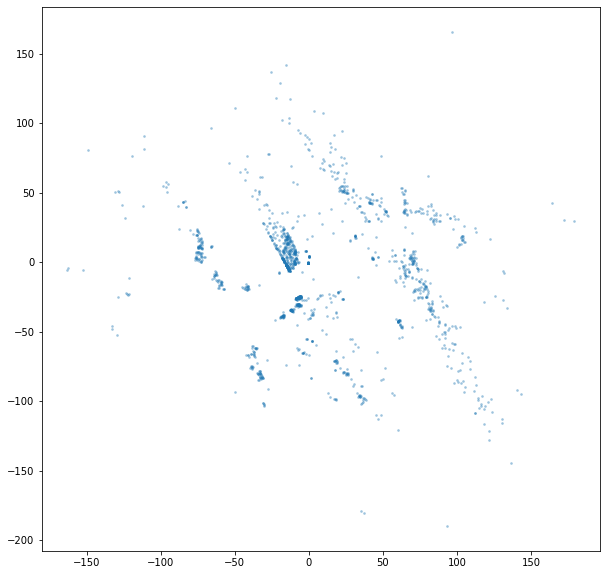

d: 0.3 thred_s: 0.3 Points: 1532
Generating Threshold Map


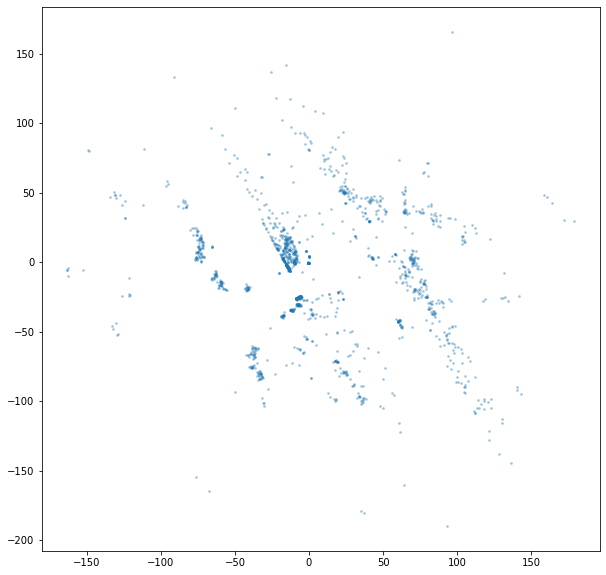

d: 0.3 thred_s: 0.4 Points: 1517
Generating Threshold Map


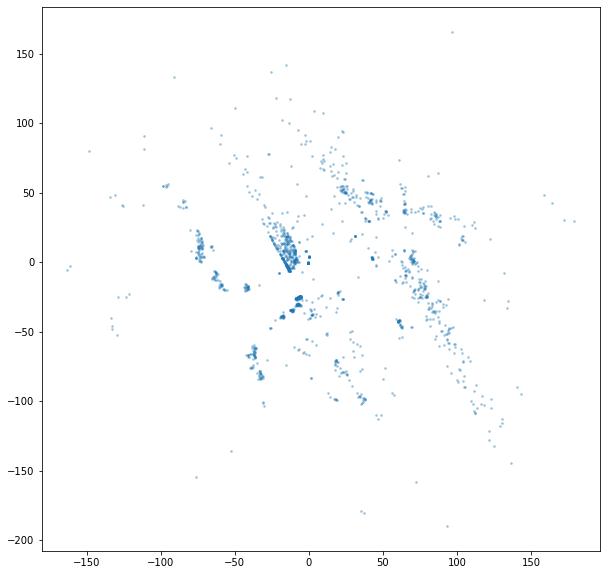

d: 0.3 thred_s: 0.5 Points: 1472
Generating Threshold Map


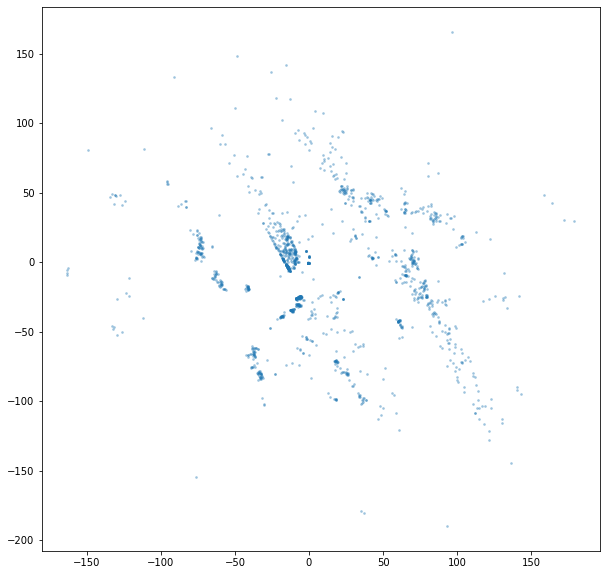

d: 0.5 thred_s: 0.15 Points: 1492
Generating Threshold Map


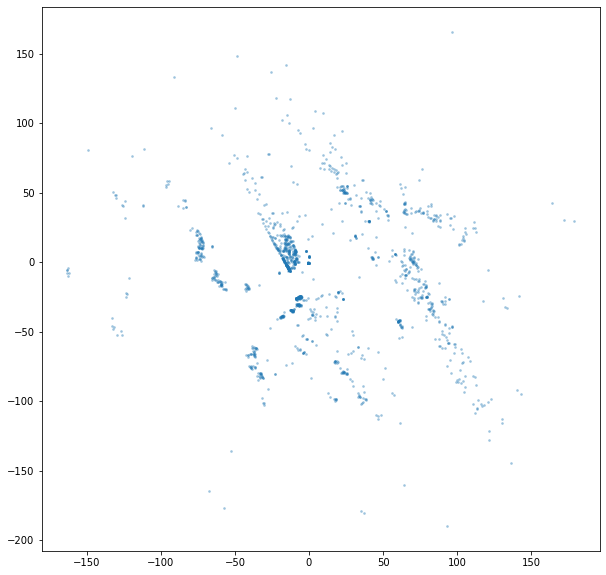

d: 0.5 thred_s: 0.2 Points: 1510
Generating Threshold Map


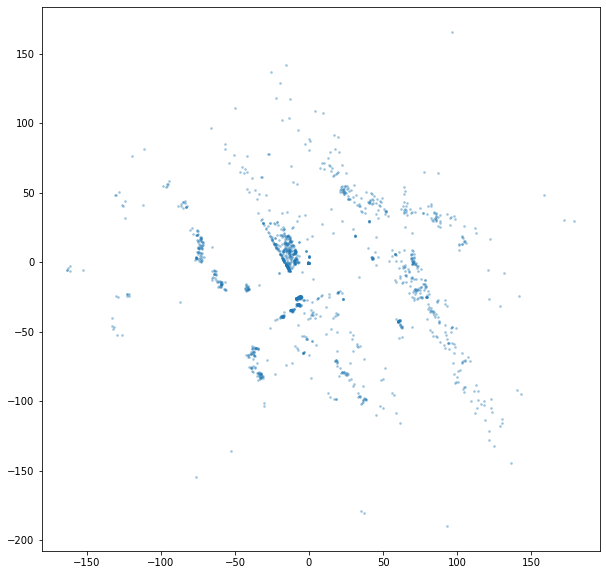

d: 0.5 thred_s: 0.3 Points: 1471
Generating Threshold Map


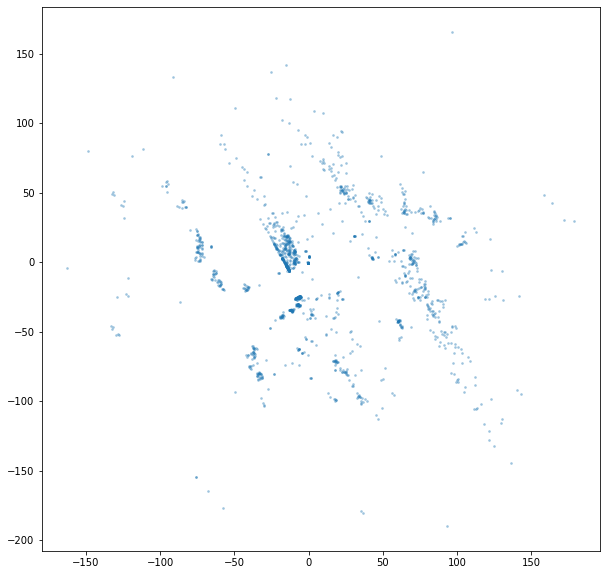

d: 0.5 thred_s: 0.4 Points: 1488
Generating Threshold Map


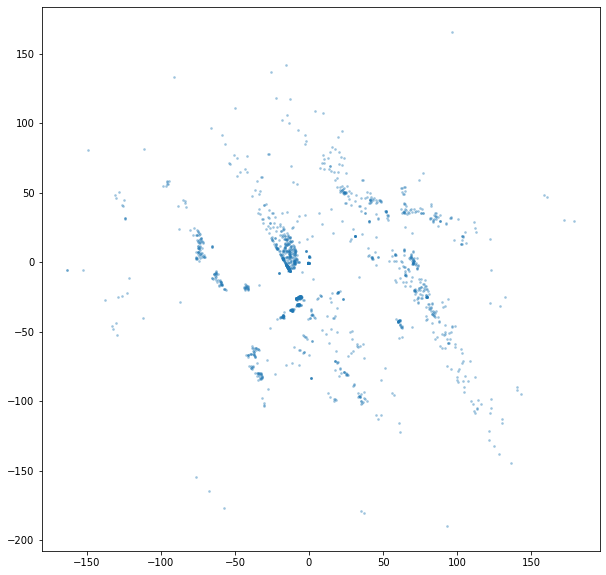

d: 0.5 thred_s: 0.5 Points: 1491
Generating Threshold Map


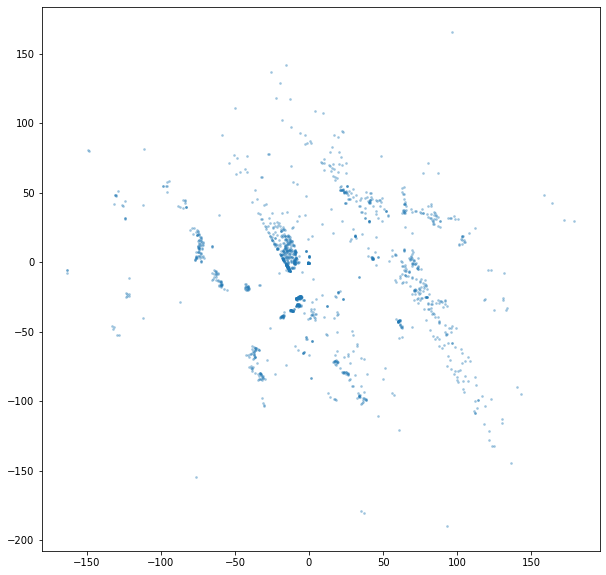

d: 0.8 thred_s: 0.15 Points: 1508
Generating Threshold Map


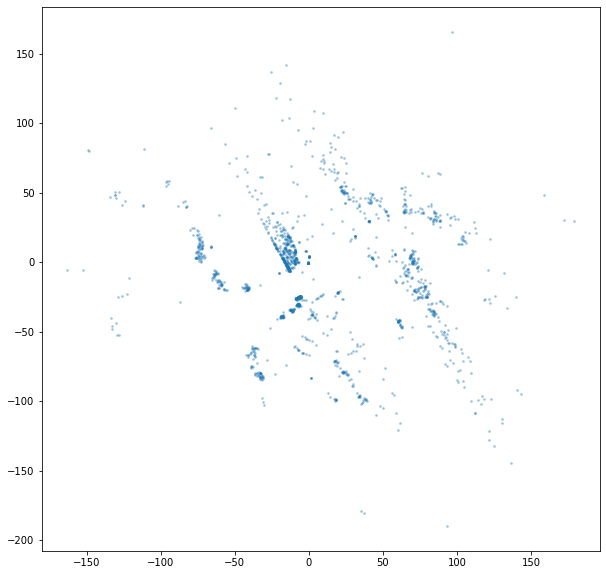

d: 0.8 thred_s: 0.2 Points: 1564
Generating Threshold Map


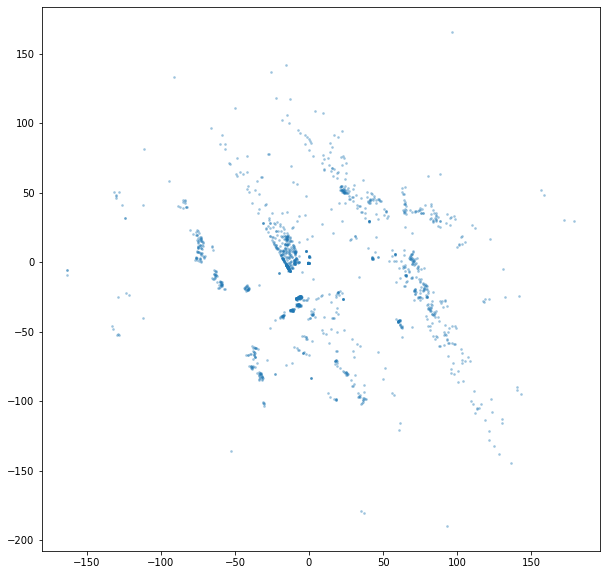

d: 0.8 thred_s: 0.3 Points: 1491
Generating Threshold Map


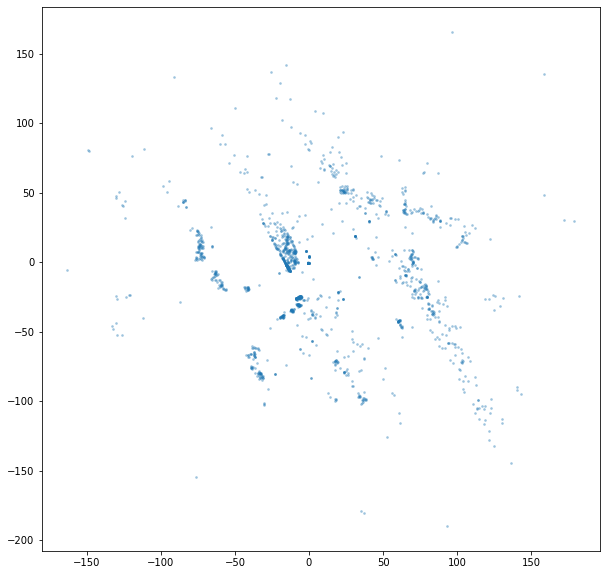

d: 0.8 thred_s: 0.4 Points: 1518
Generating Threshold Map


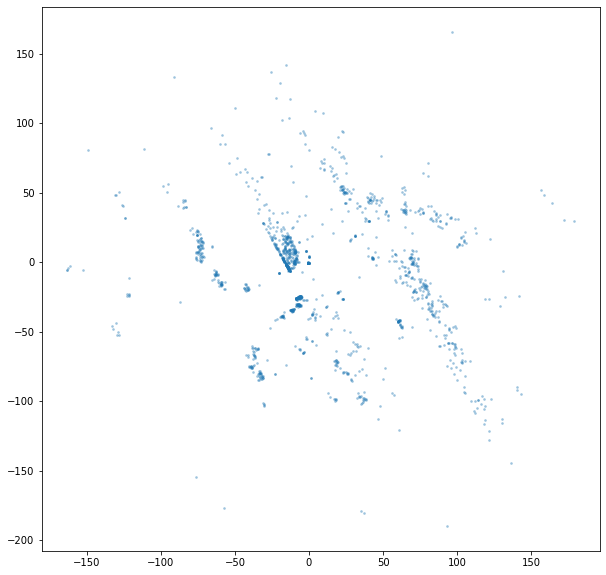

d: 0.8 thred_s: 0.5 Points: 1480
Generating Threshold Map


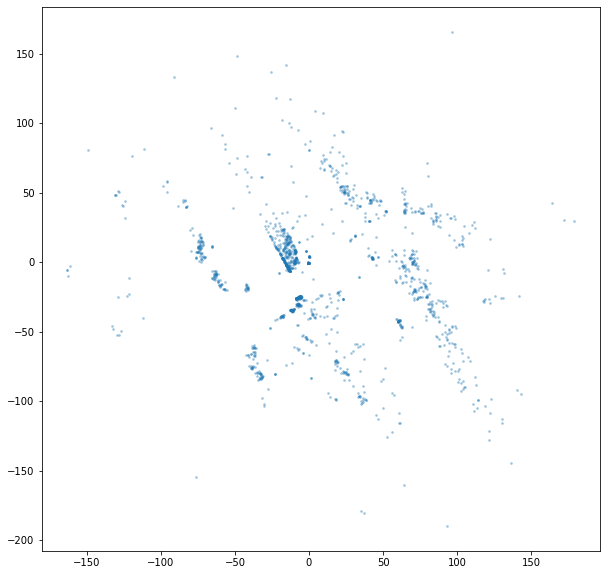

d: 1 thred_s: 0.15 Points: 1531
Generating Threshold Map


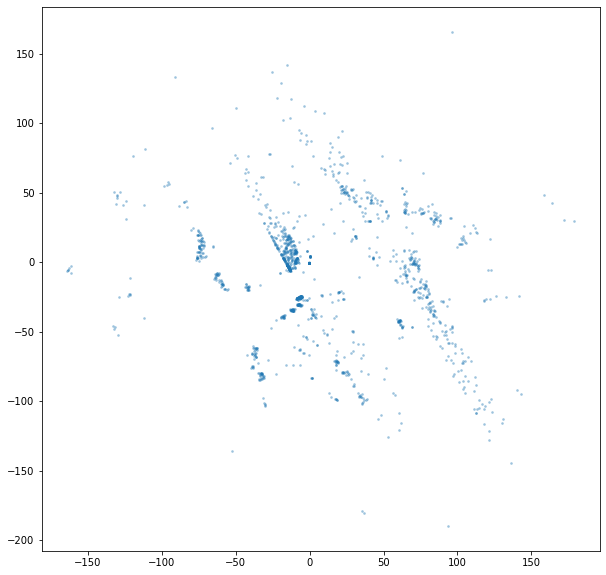

d: 1 thred_s: 0.2 Points: 1479
Generating Threshold Map


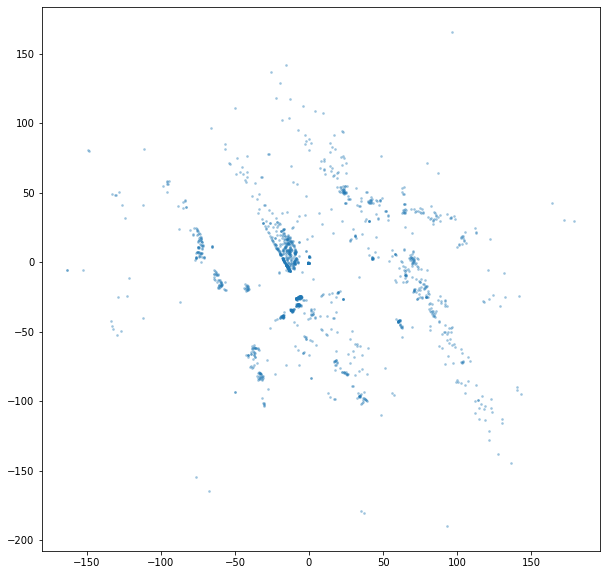

d: 1 thred_s: 0.3 Points: 1519
Generating Threshold Map


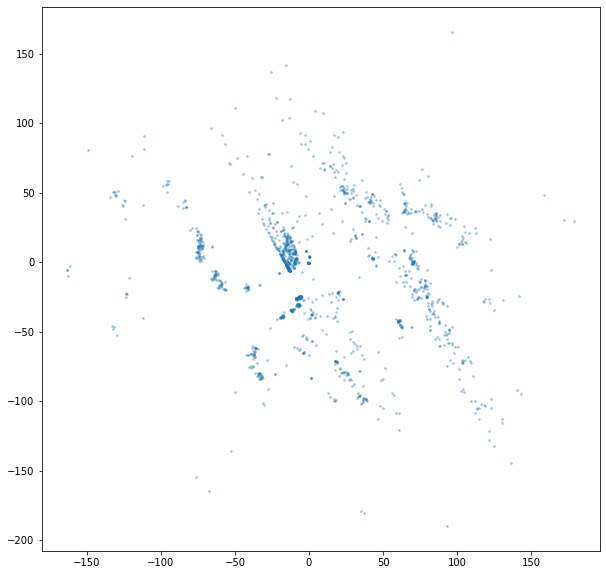

d: 1 thred_s: 0.4 Points: 1504
Generating Threshold Map


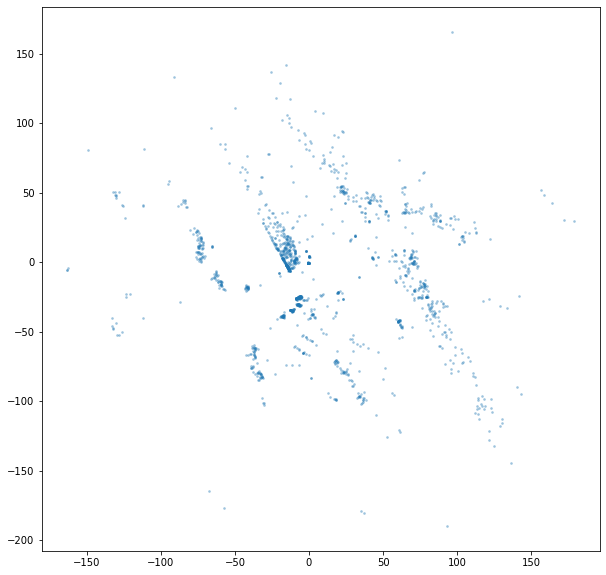

d: 1 thred_s: 0.5 Points: 1511
Generating Threshold Map


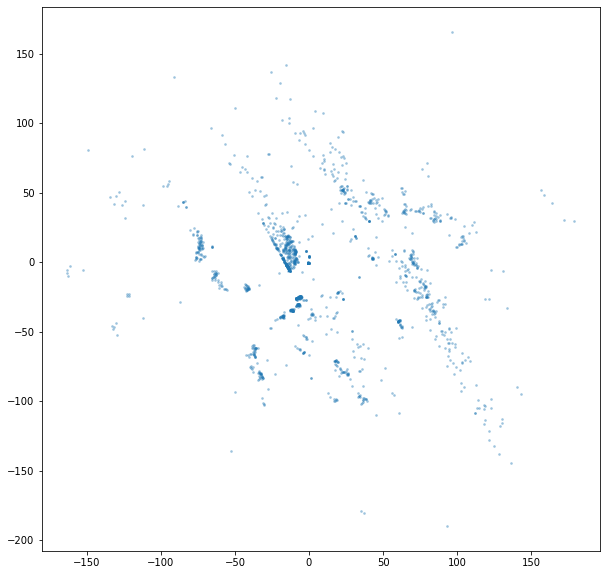

d: 1.2 thred_s: 0.15 Points: 1550
Generating Threshold Map


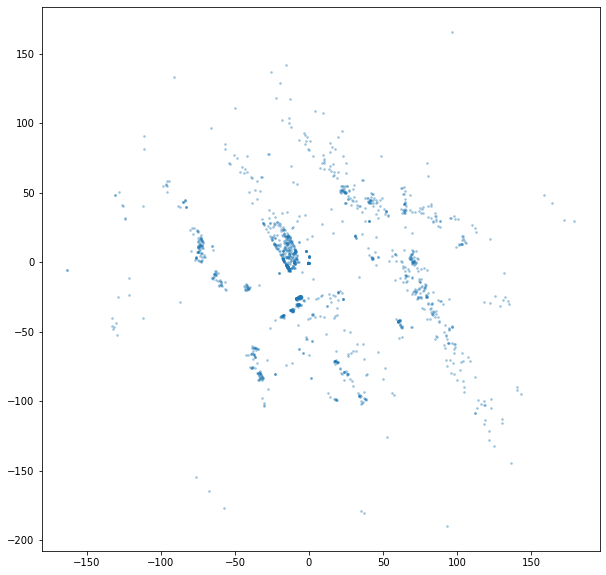

d: 1.2 thred_s: 0.2 Points: 1509
Generating Threshold Map


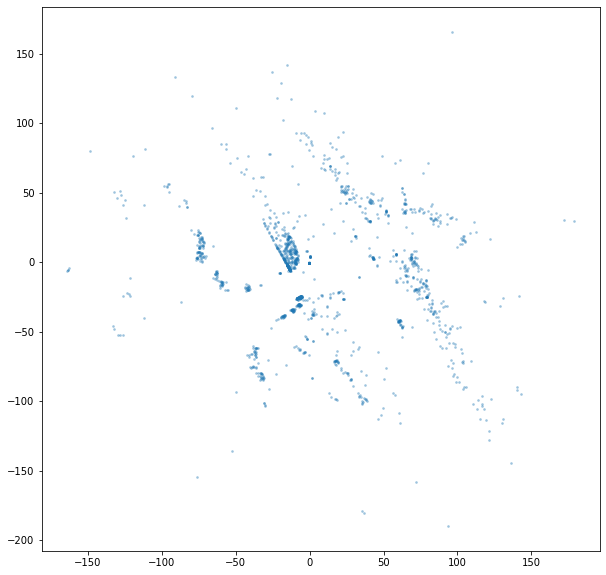

d: 1.2 thred_s: 0.3 Points: 1502
Generating Threshold Map


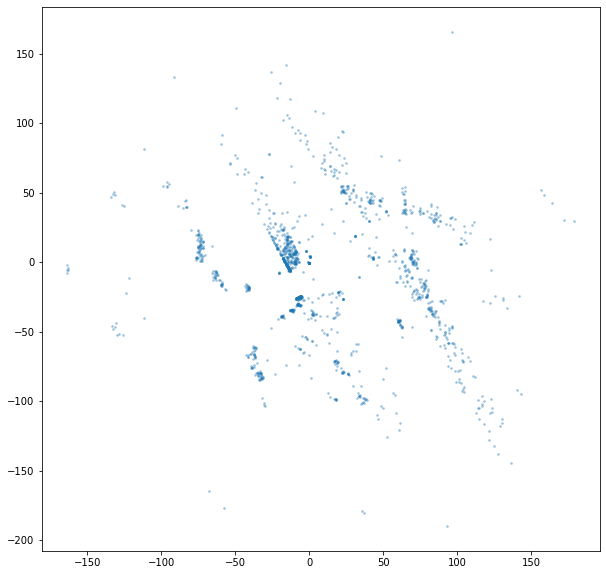

d: 1.2 thred_s: 0.4 Points: 1493
Generating Threshold Map


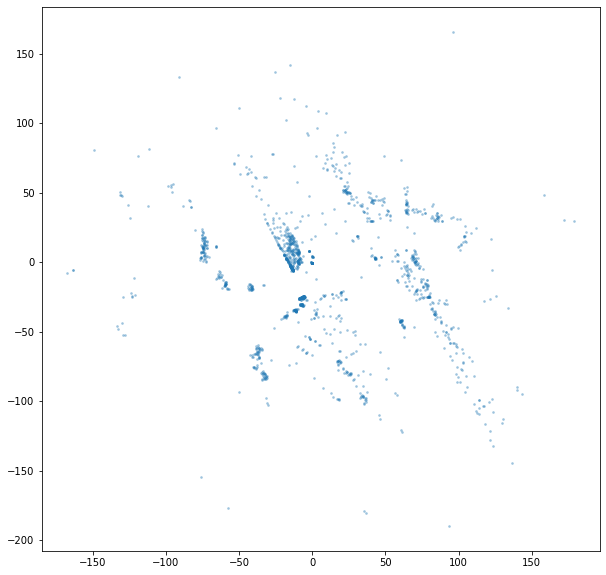

d: 1.2 thred_s: 0.5 Points: 1507


In [29]:
for d in [0.2,0.3,0.5,0.8,1,1.2]:
    for thred_s in [0.15,0.2,0.3,0.4,0.5]:
        collector.gen_thredmap(d = 1,thred_s = 0.05,N = 10,delta_thred = 1e-3,step = 0.1)
        db = Raster_DBSCAN(window_size=(5,13),eps = 1.7, min_samples= 17, Td_map_szie=collector.thred_map.shape)   
        Td_map = collector.aggregated_map[0]
        Foreground_map = (Td_map < collector.thred_map)&(Td_map != 0)
        Background_map = (Td_map >= collector.thred_map)&(Td_map != 0)
        pcd = get_pcd_colored_filtered(Td_map,Labeling_map,Foreground_map)
        points = np.asarray(pcd.points)
        plt.figure(figsize=(10,10))
        plt.scatter(points[:,0],points[:,1],s = 3,alpha = 0.3)
        plt.show()
        print('d:',d,'thred_s:',thred_s,'Points:',len(points))

In [37]:
Td_map = collector.aggregated_map[1500]
Foreground_map = (Td_map < collector.thred_map)&(Td_map != 0)
Labeling_map = db.fit_predict(Td_map= Td_map,Foreground_map=Foreground_map)
Background_map = (Td_map >= collector.thred_map)&(Td_map != 0)
pcd = get_pcd_colored_filtered(Td_map,Labeling_map,Foreground_map)
draw(pcd,height=1000,width=1000)

WebVisualizer(window_uid='window_10')